**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (10 points) 

Rewrite the following code into functional form using lambdas, map, filter and reduce.

In [1]:
n = 10
s = 10
for i in range(n):
    if i % 2:
        s |= i**2
s

123

In [2]:
from functools import reduce
reduce(lambda x,y: x|y, map(lambda x:x**2, filter(lambda x:x % 2, range(10))), 10)

123

**2**. (10 points)

Rewrite the code above as a `toolz` pipeline, using lambdas and curried or partially applied functions as necessary.

In [11]:
from toolz.curried import pipe, map, filter, reduce, accumulate
from functools import partial

op = partial(accumulate, initial = 10)
res = pipe(range(10), filter(lambda x: x%2),
           map(lambda x:x**2),
           op(lambda x, y: x|y),
           list,
           lambda x:x[-1])
res

123

**3**. (10 points) 

Repeat the Buffon's needle simulation from Lab01 as a function that takes the number of needels `n` as input and returns the estimate of $\pi$. The function should use `numpy` and vectorization.  What is $\pi$ for 1 million needles?

In [23]:
import numpy as np
import random 
#perform Monte Carlo simulation considering the simplest case: L=D
def Buffon_needle(n):
    '''This function return the pi
    with input as needles dropped on the lines n
    '''
    a = np.random.uniform(0, 1, n)
    b = np.random.uniform(0, 1, n)
    c = np.sqrt(a**2 + b**2)
    
    return c[c<1].shape[0]/n*4

random.seed(123)
print(Buffon_needle(1000000))


3.141128


**4**. (20 points) 

Simpsons rule is given by the follwoing approximation

![Simpsons](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0cdf0804bb8810e4438cbea898dc7a2fedb3e57)

- Write Simpsons rule as a function `simpsons(f, a, b, n=100)` where n is the number of equally spaced intervals from `a` to `b`.  (10 points)
- Use this function to estimate the probability mass of the standard normal distribution between -1 and 1. Implement the PDF of the standard normal distribution $\psi(x)$ as a function. (10 points)

$$
\psi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

In [14]:
from scipy.stats import norm
from math import sin, pi

#function for simpsons approximation
def simpsons(f, a, b, n = 100):
    """using a, b, n, and f to 
    perform Simpsons Approximation
    """
    h = (b-a)/float(n)
    sum1 = 0.0
    sum2 = 0.0
    for i in range(1,n//2):
        sum1 += f(a + 2*i*h)
    sum1 *=2
    
    for i in range(1,n//2 + 1):
        sum2 += f(a + (2*i - 1)*h)
    sum2 *=4

    return (h/3)*(f(a)+f(b)+sum1+sum2)

#print out the probability mass of the standard normal distribution
simpsons(norm.pdf, -1, 1, n = 100)

0.68268949299754922

**5**. (50 points)

Write code to generate a plot similar to the following 

![automata](./automata1d.png)

using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

In [4]:
%matplotlib inline

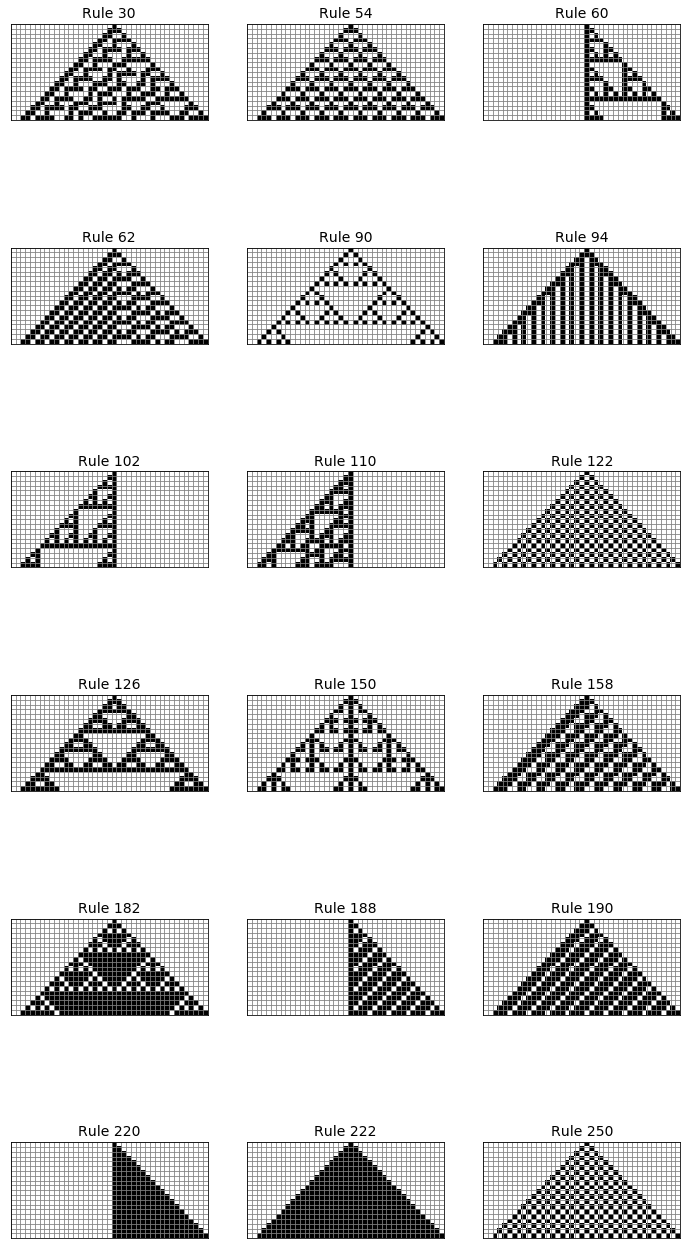

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

##helper methods
#this method returns rule
def generate_rule(rule):
    rule_str = format(rule, '#010b')[2:]

    rule = {
        (1, 1, 1): int(rule_str[0]) ,
        (1, 1, 0): int(rule_str[1]) ,
        (1, 0, 1): int(rule_str[2]) ,
        (1, 0, 0): int(rule_str[3]) ,
        (0, 1, 1): int(rule_str[4]) ,
        (0, 1, 0): int(rule_str[5]) ,
        (0, 0, 1): int(rule_str[6]) ,
        (0, 0, 0): int(rule_str[7]) 
    }

    return rule

#generate first row
def generate_initial_state(ncols = 31, niters = 16):
    grid = np.zeros(shape=(niters, ncols))
    grid[0, ncols//2+1] = 1
    
    return grid

#apply rules to generate next generation
def process(generation, rule):
    new_generation = []

    for i, cell in enumerate(generation):
        neighbours = []
        if i == 0:
            neighbours = [generation[len(generation) - 1], cell, generation[1]]
        elif i == len(generation) - 1:
            neighbours = [generation[len(generation) - 2], cell, generation[0]]
        else:
            neighbours = [generation[i - 1], cell, generation[i + 1]]

        new_generation.append(rule[tuple(neighbours)])

    return new_generation

#create graphs    
def make_plots(ncols, niters, rule):
    fig = plt.figure(figsize = (12, 24))
    for j in range(len(rule)):
        initial_state = generate_initial_state(ncols, niters)
        rules = generate_rule(rule[j])
        #update the grid by rules
        for i in range(1, niters):
            initial_state[i] = process(initial_state[i-1], rules)
          
        #plot the grid using matplotlib
        ax = fig.add_subplot(6, 3, j+1)
        plt.title('Rule %d' % rule[j], fontsize=14)
        plt.imshow(initial_state, interpolation='nearest', cmap='Greys') 
        plt.grid(color='Grey')
        ax.set_xticks(np.arange(-0.5, 2 * niters + 0.5, 1))
        ax.set_yticks(np.arange(-0.5, niters + 0.5, 1))       
        ax.tick_params(axis='both', which='both',bottom='off', top='off', left = 'off', 
                       labelbottom='off', labelright = 'off', labelleft='off') 
        pass


#generate graphs based on a list of rules
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(41, 20, rules)

